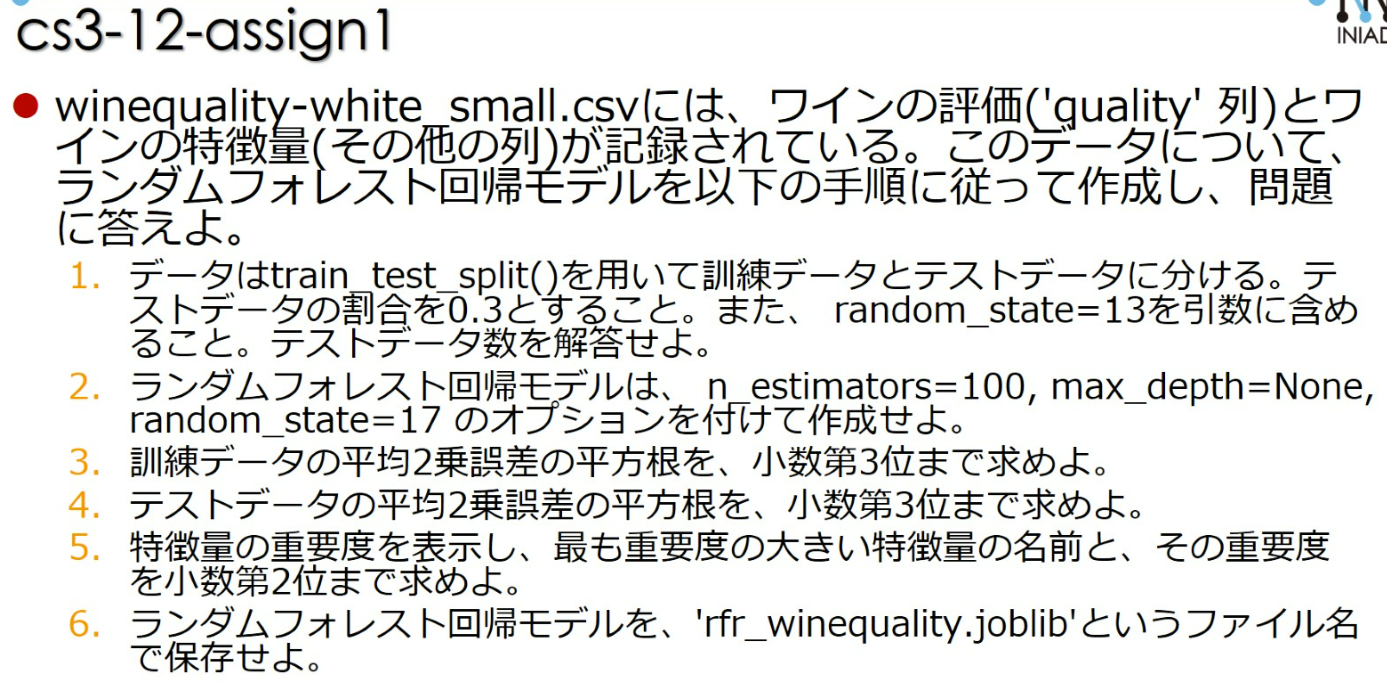

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from joblib import dump

In [2]:
csv_in = 'winequality-white_small.csv'
df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(1223, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1223 non-null   float64
 1   volatile_acidity      1223 non-null   float64
 2   citric_acid           1223 non-null   float64
 3   residual_sugar        1223 non-null   float64
 4   chlorides             1223 non-null   float64
 5   free_sulfur_dioxide   1223 non-null   float64
 6   total_sulfur_dioxide  1223 non-null   float64
 7   density               1223 non-null   float64
 8   pH                    1223 non-null   float64
 9   sulphates             1223 non-null   float64
 10  alcohol               1223 non-null   float64
 11  quality               1223 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 114.8 KB
None


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
1,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
3,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4,7
4,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


In [3]:
X = df.drop(columns='quality')  # features
y = df['quality']  # true values    
print('X:', X.shape)
display(X.head())
print('y:', y.shape)
print(y.head())

X: (1223, 11)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
1,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8
3,6.6,0.17,0.38,1.50,0.032,28.0,112.0,0.9914,3.25,0.55,11.4
4,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8


y: (1223,)
0    6
1    5
2    5
3    7
4    8
Name: quality, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=13)

In [5]:
print(X_train.shape)
print(y_train.shape)

(856, 11)
(856,)


In [6]:
print(X_test.shape)
print(y_test.shape)

(367, 11)
(367,)


In [7]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=None,
                          random_state=17)  

In [8]:
%%time
rfr.fit(X_train, y_train)

CPU times: total: 719 ms
Wall time: 741 ms


RandomForestRegressor(random_state=17)

In [9]:
ser_fi = pd.Series(rfr.feature_importances_, index=X_train.columns)
print(ser_fi.sort_values(ascending=False))

alcohol                 0.192268
volatile_acidity        0.138625
free_sulfur_dioxide     0.116240
chlorides               0.095340
pH                      0.074385
total_sulfur_dioxide    0.073426
residual_sugar          0.065539
citric_acid             0.064789
sulphates               0.063822
fixed_acidity           0.060127
density                 0.055439
dtype: float64


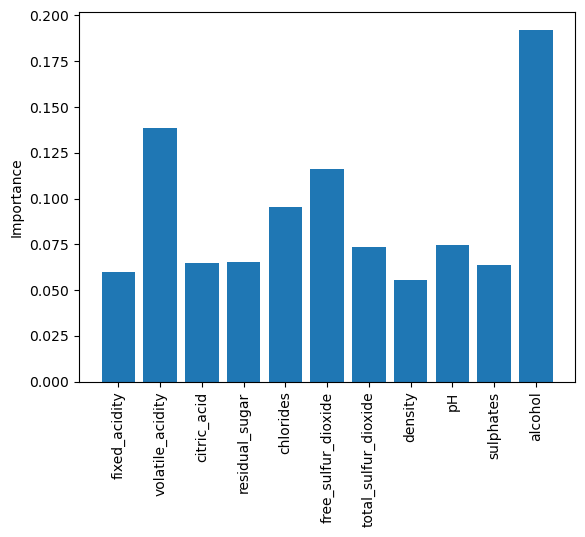

In [10]:
plt.bar(X_train.columns, rfr.feature_importances_)
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

In [11]:
y_train_pred = rfr.predict(X_train)

In [12]:
y_min = np.append(y_train_pred, y_train).min()
y_max = np.append(y_train_pred, y_train).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

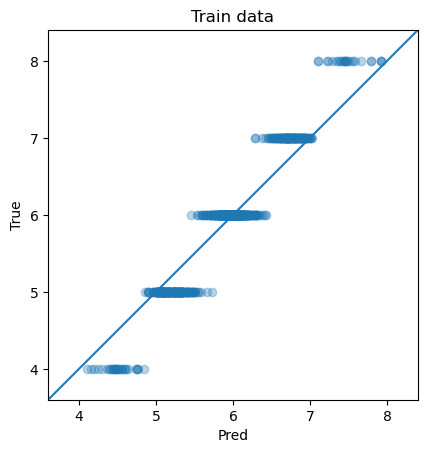

In [13]:
plt.scatter(y_train_pred, y_train, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.title('Train data')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [14]:
mse = mean_squared_error(y_train, y_train_pred)
print('MSE, RMSE for train data:', mse, np.sqrt(mse))

MSE, RMSE for train data: 0.06242418224299065 0.24984831847140906


In [15]:
y_test_pred = rfr.predict(X_test)

In [16]:
y_min = np.append(y_test_pred, y_test).min()
y_max = np.append(y_test_pred, y_test).max()
y_margin = (y_max - y_min) * 0.1
y_min -= y_margin
y_max += y_margin

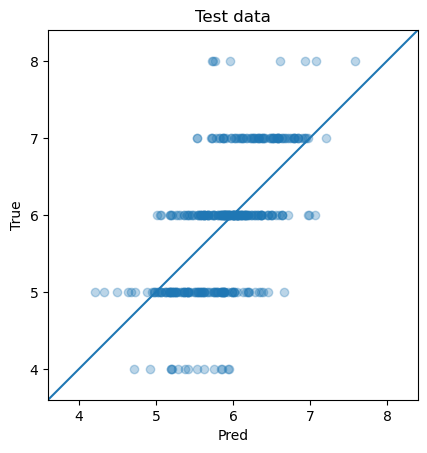

In [17]:
plt.scatter(y_test_pred, y_test, alpha=0.3)
plt.plot([y_min,y_max], [y_min,y_max])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(y_min, y_max)
plt.ylim(y_min, y_max)
plt.title('Test data')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

In [18]:
mse = mean_squared_error(y_test, y_test_pred)
print('MSE, RMSE for test data:', mse, np.sqrt(mse))

MSE, RMSE for test data: 0.47608446866485016 0.6899887453175234


In [19]:
tag = 'winequality'
model_file = 'rfr_{}.joblib'.format(tag)
dump(rfr, model_file)

['rfr_winequality.joblib']